## Tahmine Dayalı Değer Atama Yöntemleri

In [38]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [39]:
!pip install ycimpute

In [40]:
from ycimpute.imputer import knnimput

In [41]:
var_names = list(df)

In [42]:
import numpy as np
n_df = np.array(df)

In [43]:
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [44]:
n_df.shape

(891, 6)

In [45]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.112
Imputing row 101/891 with 0 missing, elapsed time: 0.114
Imputing row 201/891 with 0 missing, elapsed time: 0.115
Imputing row 301/891 with 1 missing, elapsed time: 0.117
Imputing row 401/891 with 0 missing, elapsed time: 0.118
Imputing row 501/891 with 0 missing, elapsed time: 0.121
Imputing row 601/891 with 0 missing, elapsed time: 0.122
Imputing row 701/891 with 0 missing, elapsed time: 0.123
Imputing row 801/891 with 0 missing, elapsed time: 0.123


In [46]:
type(dff)

numpy.ndarray

In [47]:
import pandas as pd
dff = pd.DataFrame(dff, columns = var_names)

In [48]:
type(dff)

pandas.core.frame.DataFrame

In [49]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [50]:
dff.to_excel('KNN_excel_table.xlsx')

In [51]:
df.to_excel(r'KNN_excel_table_nan.xlsx')

In [13]:
#random forests

In [14]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [15]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [16]:
var_names = list(df)

In [17]:
import numpy as np
n_df = np.array(df)

In [18]:
from ycimpute.imputer import iterforest

In [19]:
dff = iterforest.IterImput().complete(n_df)

AttributeError: module 'ycimpute.imputer.iterforest' has no attribute 'IterImput'

In [20]:
dff = pd.DataFrame(dff, columns = var_names)

In [21]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [24]:
#EM 

In [25]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [26]:
from ycimpute.imputer import EM

In [27]:
var_names = list(df)

In [28]:
import numpy as np
n_df = np.array(df)

In [29]:
dff = EM().complete(n_df)

In [30]:
dff = pd.DataFrame(dff, columns = var_names)

In [31]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [32]:
dff.head()

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [33]:
import missingno as msno

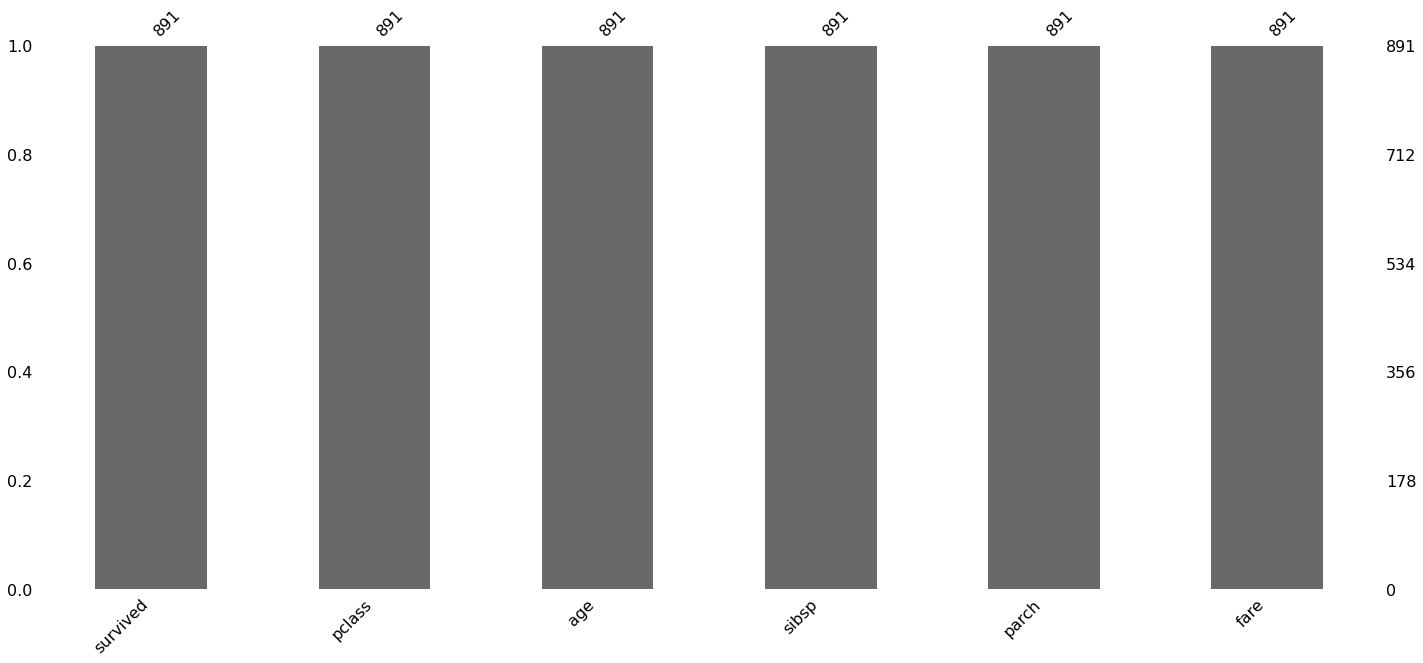

In [34]:
msno.bar(dff);

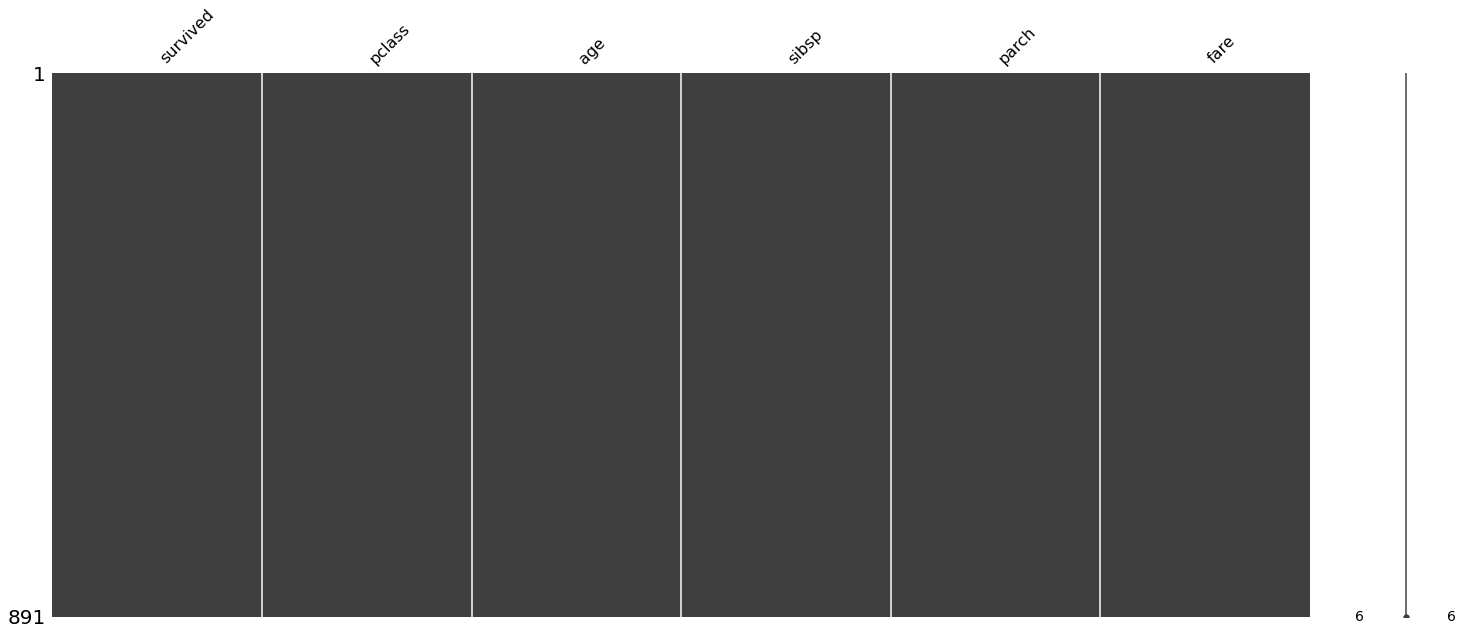

In [35]:
msno.matrix(dff);

In [36]:
#en az bir eksik değere sahip gözlemler
df[df.isnull().any(axis=1)]

,survived,pclass,age,sibsp,parch,fare
5,0,3,NaN,0,0,8.4583
17,1,2,NaN,0,0,13.0000
19,1,3,NaN,0,0,7.2250
26,0,3,NaN,0,0,7.2250
28,1,3,NaN,0,0,7.8792
...,...,...,...,...,...,...
859,0,3,NaN,0,0,7.2292
863,0,3,NaN,8,2,69.5500
868,0,3,NaN,0,0,9.5000
878,0,3,NaN,0,0,7.8958


In [37]:
dff.head(100)

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...
95,0.0,3.0,0.0,0.0,0.0,8.0500
96,0.0,1.0,71.0,0.0,0.0,34.6542
97,1.0,1.0,23.0,0.0,1.0,63.3583
98,1.0,2.0,34.0,0.0,1.0,23.0000
